Overview

In [17]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import os
import random
from os import listdir



from sklearn.utils import shuffle

In [28]:
directory_root = "../input/plant-village-dataset/PlantVillageDataset/train_val_test/train"
image_list, label_list = [], []
try:
    print("Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
                
        for single_plant_disease_image in plant_disease_folder_list :
            #Removes .DS_Store from list
            if single_plant_disease_image == ".DS_Store" :
                plant_disease_folder_list.remove(single_plant_disease_image)

        for image in plant_disease_folder_list:
            image_directory = f"{directory_root}/{plant_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(image_directory)
                label_list.append(plant_folder)
    print("Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

Loading images ...
Image loading completed


In [16]:
img_info = pd.DataFrame({'image_path':image_list,'label':label_list})
print(img_info.head())
print(len(img_info))

                                          image_path  \
0  ../input/plant-village-dataset/PlantVillageDat...   
1  ../input/plant-village-dataset/PlantVillageDat...   
2  ../input/plant-village-dataset/PlantVillageDat...   
3  ../input/plant-village-dataset/PlantVillageDat...   
4  ../input/plant-village-dataset/PlantVillageDat...   

                           label  
0  Pepper__bell___Bacterial_spot  
1  Pepper__bell___Bacterial_spot  
2  Pepper__bell___Bacterial_spot  
3  Pepper__bell___Bacterial_spot  
4  Pepper__bell___Bacterial_spot  
14436


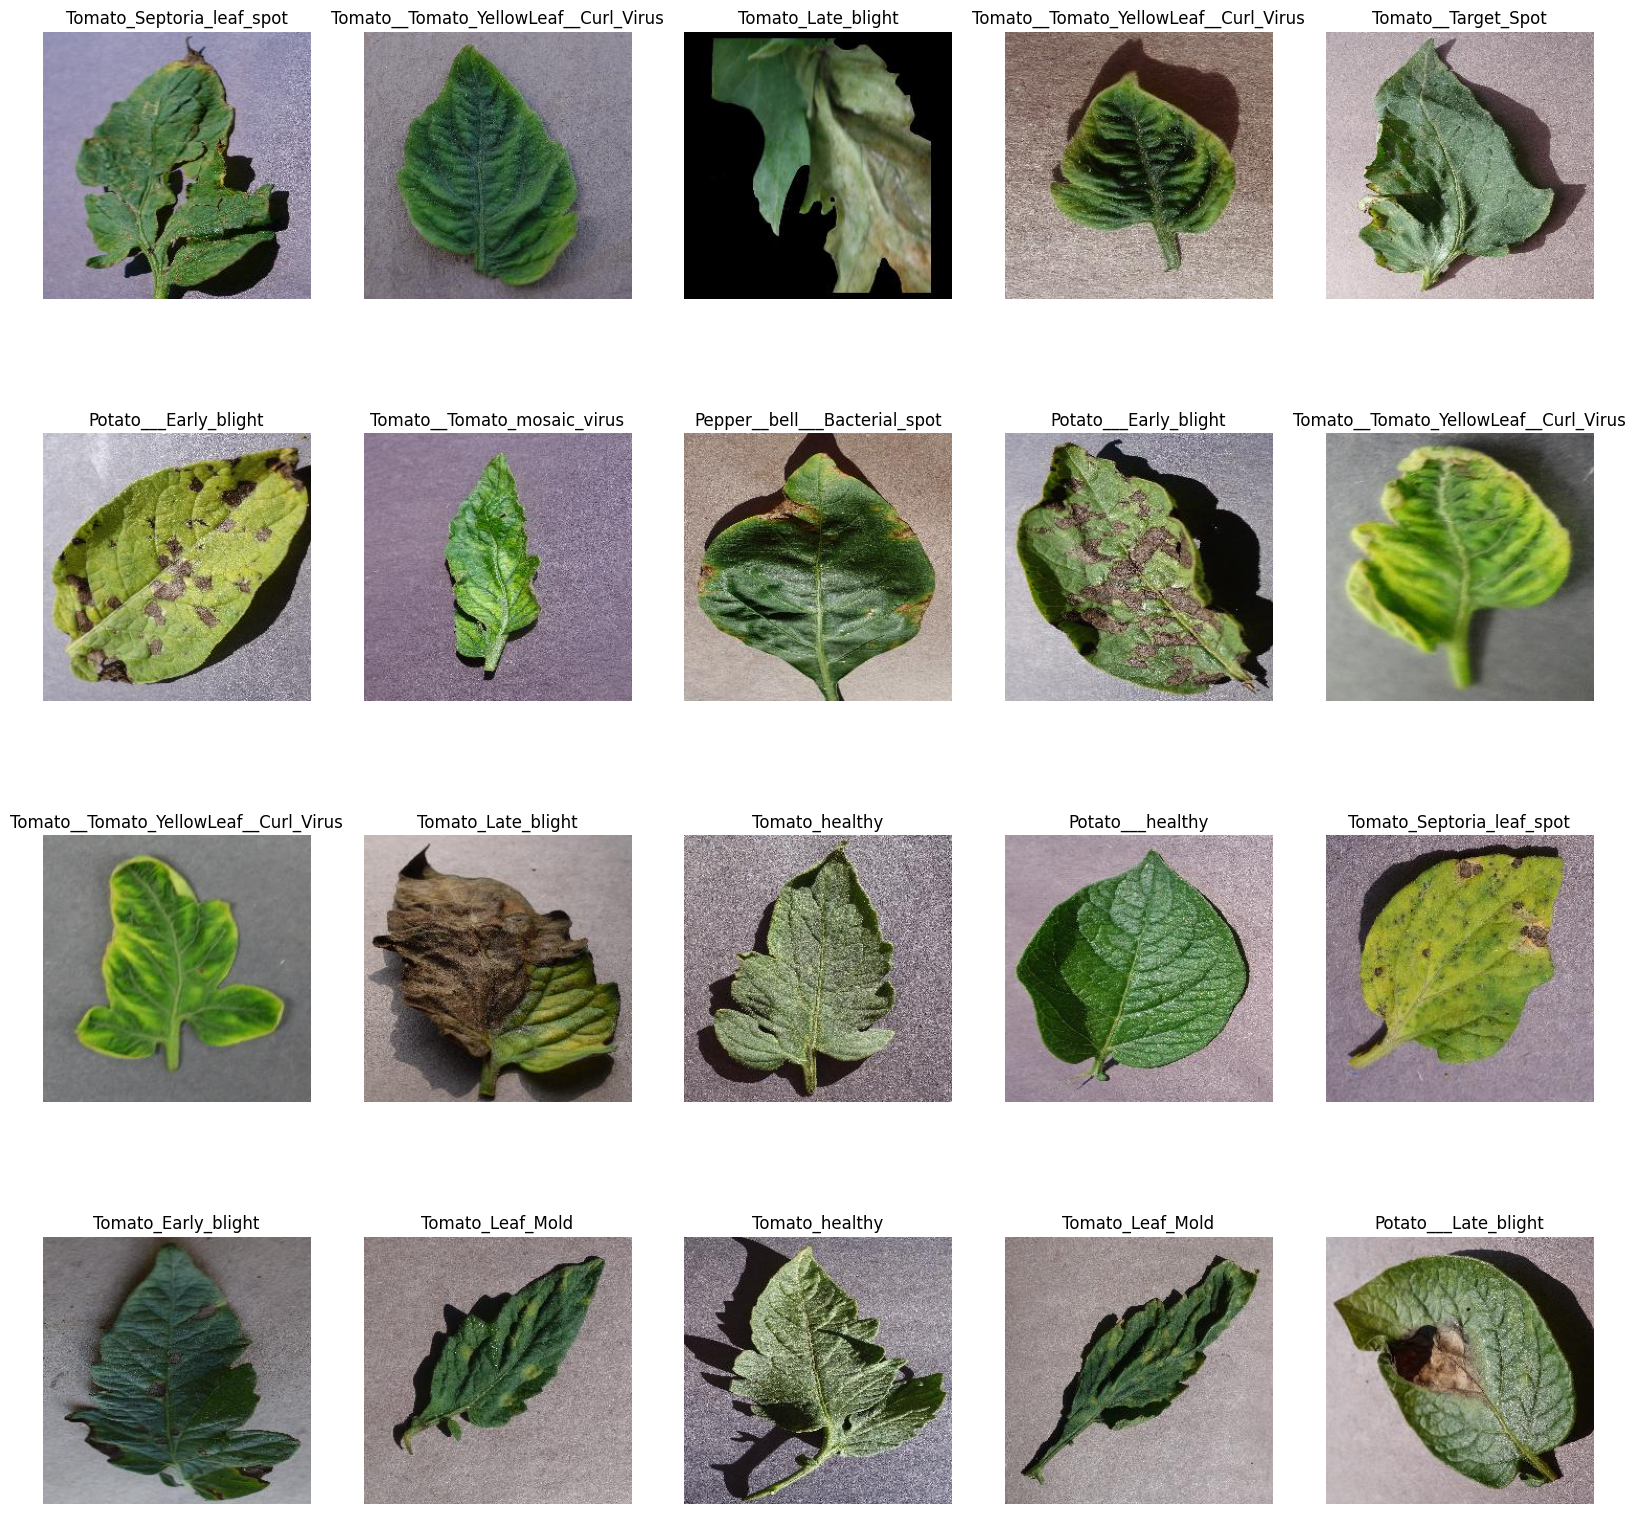

In [30]:
def display_random_images(img_info, num_images = 20):
    """Function to display a random set of plant images.
    
    Parameters:
    - img_info: DataFrame containing image paths and labels
    - num_images: Number of random images to display (default 20)"""

    #Randomly selecting images
    random_images = random.sample(list(img_info['image_path']), num_images)

    #Setting up grid
    plt.figure(figsize = (20, 20))
    
    for i, image_path in enumerate(random_images):
        # Load and display the image
        img = mpimg.imread(image_path)
        ax = plt.subplot(4, 5, i + 1)  #Adjusted to 4 rows and 5 columns
        ax.imshow(img)
        ax.axis('off')  # Hide the axis
        # Add the label (plant type) as the title of each subplot
        plant_label = img_info.loc[img_info['image_path'] == image_path, 'label'].values[0]
        ax.set_title(plant_label)

    # Show the plot
    plt.show()

display_random_images(img_info)    
    

In [31]:
img_info['label'].shape

(14436,)

In [33]:
img_info['label'].value_counts()

label
Tomato__Tomato_YellowLeaf__Curl_Virus          2245
Tomato_Bacterial_spot                          1488
Tomato_Late_blight                             1335
Tomato_Septoria_leaf_spot                      1239
Tomato_Spider_mites_Two_spotted_spider_mite    1173
Tomato_healthy                                 1113
Pepper__bell___healthy                         1034
Tomato__Target_Spot                             982
Tomato_Early_blight                             699
Potato___Late_blight                            699
Potato___Early_blight                           699
Pepper__bell___Bacterial_spot                   697
Tomato_Leaf_Mold                                666
Tomato__Tomato_mosaic_virus                     261
Potato___healthy                                106
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


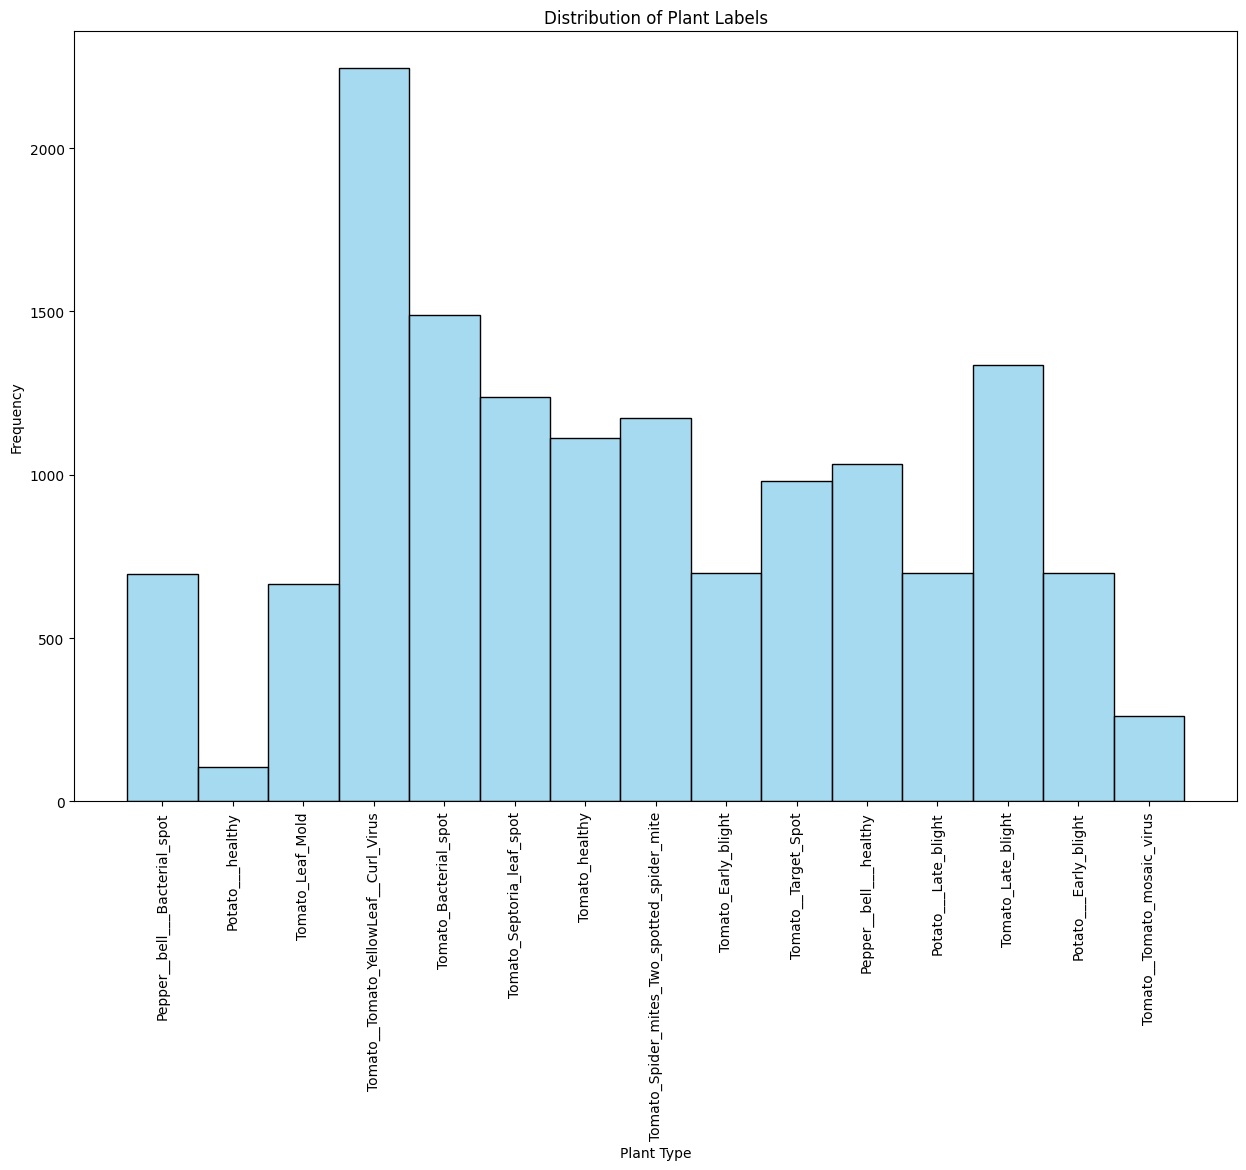

In [52]:
# Plotting the distribution of the labels
plt.figure(figsize=(15, 10))  
sns.histplot(x = img_info['label'], kde = False, color = 'skyblue')  
plt.xticks(rotation = 90)  
plt.title("Distribution of Plant Labels")  
plt.xlabel("Plant Type")  
plt.ylabel("Frequency") 
plt.show()


In [39]:
img_info.isnull().sum()

image_path        0
label             0
labels_integer    0
dtype: int64

In [35]:
#Adding a new column as the integer representation of the labels
img_info["labels_integer"] = None
#index of new column
index_labels_integer = img_info.columns.get_loc("labels_integer")
#index of species column
index_species = img_info.columns.get_loc("label")
#to assign numeric labels starting with 0 for the first species
k = 0 
for i in range(len(img_info)):
    if i == 0:
        img_info.iloc[i, index_labels_integer] = k
    if i > 0:
        if img_info.iloc[i-1, index_species] == img_info.iloc[i, index_species]:
            img_info.iloc[i, index_labels_integer] = k
        else:
            k += 1
            img_info.iloc[i, index_labels_integer] = k


,image_path,label,labels_integer
14431,../input/plant-village-dataset/PlantVillageDat...,Tomato__Tomato_mosaic_virus,14
14432,../input/plant-village-dataset/PlantVillageDat...,Tomato__Tomato_mosaic_virus,14
14433,../input/plant-village-dataset/PlantVillageDat...,Tomato__Tomato_mosaic_virus,14
14434,../input/plant-village-dataset/PlantVillageDat...,Tomato__Tomato_mosaic_virus,14
14435,../input/plant-village-dataset/PlantVillageDat...,Tomato__Tomato_mosaic_virus,14


In [36]:
img_info.head()

,image_path,label,labels_integer
0,../input/plant-village-dataset/PlantVillageDat...,Pepper__bell___Bacterial_spot,0
1,../input/plant-village-dataset/PlantVillageDat...,Pepper__bell___Bacterial_spot,0
2,../input/plant-village-dataset/PlantVillageDat...,Pepper__bell___Bacterial_spot,0
3,../input/plant-village-dataset/PlantVillageDat...,Pepper__bell___Bacterial_spot,0
4,../input/plant-village-dataset/PlantVillageDat...,Pepper__bell___Bacterial_spot,0


In [37]:
img_info['labels_integer'].value_counts()

labels_integer
3     2245
4     1488
12    1335
5     1239
7     1173
6     1113
10    1034
9      982
8      699
11     699
13     699
0      697
2      666
14     261
1      106
Name: count, dtype: int64